# 라이브러리 로드

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import set_matplotlib_formats

warnings.filterwarnings(action = 'ignore')
set_matplotlib_formats('svg')
plt.style.use('seaborn')

# 한글화

In [2]:
#나눔 고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()
# 진행후에 런타임 다시시작
print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['NanumBarunGothic']


# 데이터

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/cafeteria/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [5]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [6]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


## 데이터 정제
- 조식, 중식, 석식 메뉴 Drop
- 일자, 요일은 라벨 인코딩(숫자형으로 변환)
- 식사가능자수 만들기
  - 본사정원수 - (휴가자 + 재택근무자)
- 식사참여율  = 식사계 / 식사가능자수

### 조식, 중식 석식 메뉴 Drop

In [9]:
drops = ['조식메뉴', '중식메뉴',"석식메뉴"]

train = train.drop(drops, axis = 1)
test = test.drop(drops, axis= 1)

In [10]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0


In [11]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,2021-01-27,수,2983,88,182,5,358.0
1,2021-01-28,목,2983,104,212,409,348.0
2,2021-01-29,금,2983,270,249,0,294.0
3,2021-02-01,월,2924,108,154,538,322.0
4,2021-02-02,화,2924,62,186,455,314.0


### 일자, 요일 라벨 인코딩(숫자형으로 변환)

In [12]:
train['월'] = pd.DatetimeIndex(train['일자']).month
test['월'] = pd.DatetimeIndex(test['일자']).month

train['일'] = pd.DatetimeIndex(train['일자']).day
test['일'] = pd.DatetimeIndex(test['일자']).day

In [13]:
weekday = {
    '월' : 1,
    '화' : 2,
    '수' : 3,
    "목" : 4,
    "금" : 5
}

train['요일'] = train['요일'].map(weekday)
test['요일'] = test['요일'].map(weekday)

In [14]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,925.0,330.0,2,5


In [15]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,월,일
0,2021-01-27,3,2983,88,182,5,358.0,1,27
1,2021-01-28,4,2983,104,212,409,348.0,1,28
2,2021-01-29,5,2983,270,249,0,294.0,1,29
3,2021-02-01,1,2924,108,154,538,322.0,2,1
4,2021-02-02,2,2924,62,186,455,314.0,2,2


### 식사가능자수 만들기

In [16]:
train['식사가능자수'] = train['본사정원수'] - (train['본사휴가자수'] + train['현본사소속재택근무자수'])
test['식사가능자수'] = test['본사정원수'] - (test['본사휴가자수'] + test['현본사소속재택근무자수'])

In [17]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,월,일,식사가능자수
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2,1,2551.0
1,2016-02-02,2,2601,50,173,319,0.0,867.0,560.0,2,2,2551.0
2,2016-02-03,3,2601,56,180,111,0.0,1017.0,573.0,2,3,2545.0
3,2016-02-04,4,2601,104,220,355,0.0,978.0,525.0,2,4,2497.0
4,2016-02-05,5,2601,278,181,34,0.0,925.0,330.0,2,5,2323.0


In [18]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,월,일,식사가능자수
0,2021-01-27,3,2983,88,182,5,358.0,1,27,2537.0
1,2021-01-28,4,2983,104,212,409,348.0,1,28,2531.0
2,2021-01-29,5,2983,270,249,0,294.0,1,29,2419.0
3,2021-02-01,1,2924,108,154,538,322.0,2,1,2494.0
4,2021-02-02,2,2924,62,186,455,314.0,2,2,2548.0


### 식사참여율 만들기

In [19]:
train['중식참여율'] = train['중식계'] / train['식사가능자수']
train['석식참여율'] = train['석식계'] / train['식사가능자수']

# 데이터 정리

In [20]:
features  = ['월', '일','요일','식사가능자수',"본사출장자수","본사시간외근무명령서승인건수"]
labels = ['중식계','석식계','중식참여율','석식참여율']

train = train[features + labels]
test = test[features]

In [21]:
train.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수,중식계,석식계,중식참여율,석식참여율
0,2,1,1,2551.0,150,238,1039.0,331.0,0.407291,0.129753
1,2,2,2,2551.0,173,319,867.0,560.0,0.339867,0.219522
2,2,3,3,2545.0,180,111,1017.0,573.0,0.399607,0.225147
3,2,4,4,2497.0,220,355,978.0,525.0,0.391670,0.210252
4,2,5,5,2323.0,181,34,925.0,330.0,0.398192,0.142058


In [22]:
test.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수
0,1,27,3,2537.0,182,5
1,1,28,4,2531.0,212,409
2,1,29,5,2419.0,249,0
3,2,1,1,2494.0,154,538
4,2,2,2,2548.0,186,455


# EDA

In [23]:
train.corr()[['중식계', "석식계"]]

,중식계,석식계
월,-0.154664,-0.127142
일,-0.097392,-0.185565
요일,-0.731563,-0.312112
식사가능자수,0.151029,0.118615
본사출장자수,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.535611,0.571168
중식계,1.000000,0.508287
석식계,0.508287,1.000000
중식참여율,0.957156,0.475360
석식참여율,0.479768,0.973722


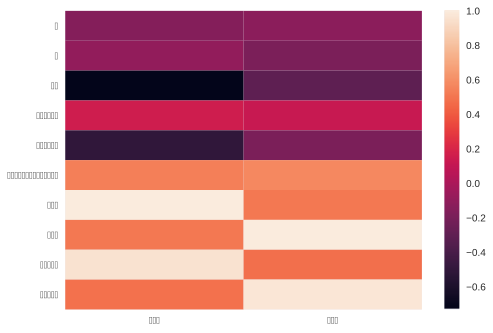

In [26]:
sns.heatmap(train.corr()[['중식계',"석식계"]])

중식
- 1.요일(-0.731)
- 2.본사시간외근무명령서승인건수(0.535)
- 3.본사출장자수(-0.512)

석식
- 1.본사시간외근무명령서승인건수(0.571)
- 2.요일(-0.312)
- 3.본사출장자수(-0.188)

In [27]:
train.corr()[['중식참여율','석식참여율']]

,중식참여율,석식참여율
월,-0.166198,-0.139499
일,-0.100648,-0.186355
요일,-0.697276,-0.284943
식사가능자수,-0.133553,-0.097914
본사출장자수,-0.618408,-0.267198
본사시간외근무명령서승인건수,0.473097,0.518348
중식계,0.957156,0.479768
석식계,0.475360,0.973722
중식참여율,1.000000,0.511255
석식참여율,0.511255,1.000000


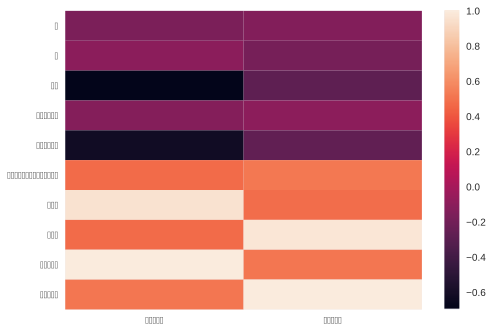

In [28]:
sns.heatmap(train.corr()[['중식참여율','석식참여율']])

In [29]:
train.corr()['중식참여율'].sort_values()

요일               -0.697276
본사출장자수           -0.618408
월                -0.166198
식사가능자수           -0.133553
일                -0.100648
본사시간외근무명령서승인건수    0.473097
석식계               0.475360
석식참여율             0.511255
중식계               0.957156
중식참여율             1.000000
Name: 중식참여율, dtype: float64

In [30]:
train.corr()['석식참여율'].sort_values()

요일               -0.284943
본사출장자수           -0.267198
일                -0.186355
월                -0.139499
식사가능자수           -0.097914
중식계               0.479768
중식참여율             0.511255
본사시간외근무명령서승인건수    0.518348
석식계               0.973722
석식참여율             1.000000
Name: 석식참여율, dtype: float64

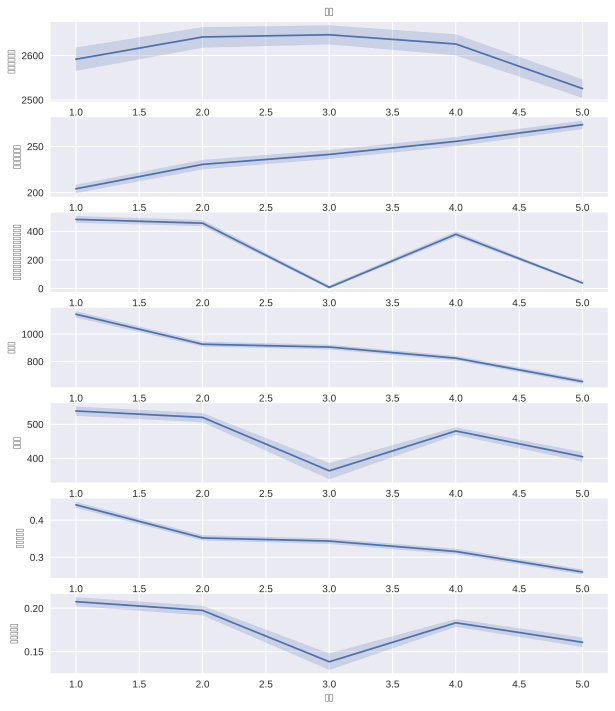

In [31]:
f, ax = plt.subplots(7, figsize=(10,12))

columns = ['식사가능자수', '본사출장자수','본사시간외근무명령서승인건수','중식계',"석식계",'중식참여율','석식참여율']
for i, column in enumerate(columns):
  sns.lineplot(data=train, x='요일', y=column, ax=ax[i])
  ax[0].set_title("요일")
plt.show()

중식계는 본사출장자수와 반비례관계

석식계는 본사시간외근무명령서승인건수와 정비례관계

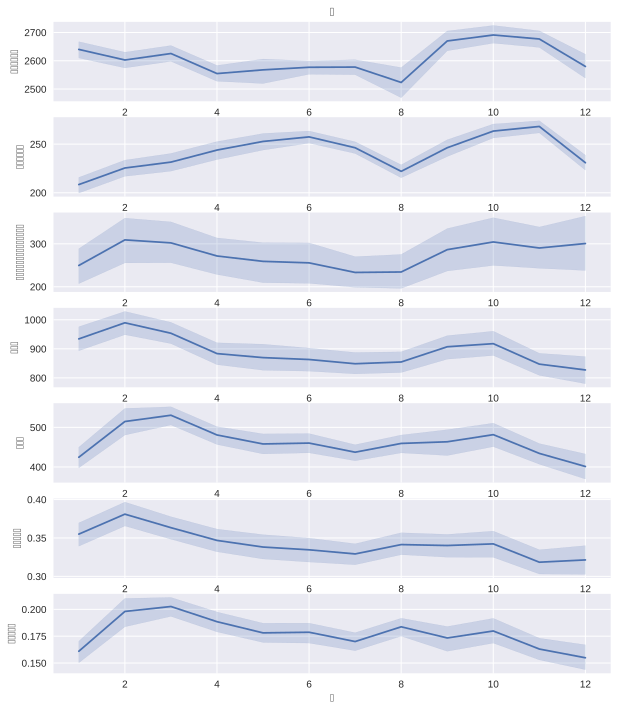

In [32]:
f, ax = plt.subplots(7, figsize=(10,12))


columns = ['식사가능자수', '본사출장자수','본사시간외근무명령서승인건수','중식계',"석식계",'중식참여율','석식참여율']
for i, column in enumerate(columns):
  sns.lineplot(data=train, x='월', y=column, ax=ax[i])
  ax[0].set_title("월")
plt.show()

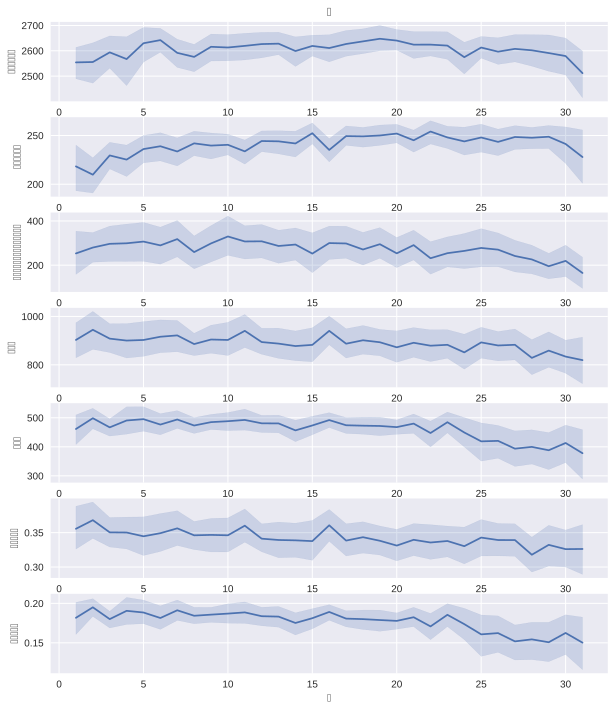

In [33]:
f, ax = plt.subplots(7, figsize=(10,12))


columns = ['식사가능자수', '본사출장자수','본사시간외근무명령서승인건수','중식계',"석식계",'중식참여율','석식참여율']
for i, column in enumerate(columns):
  sns.lineplot(data=train, x='일', y=column, ax=ax[i])
  ax[0].set_title("일")
plt.show()

수요일에 랭크가 작았던 이유가 수요일날에 빠진 날이 많다고 생각함
- 43일에 석식계가 0인날
- '자기개발의 날'이나 공휴일 전으로 파악됨.
- 0인날을 제외하고 다시 그래프 그리기

In [34]:
train.loc[train['석식계'] == 0.0, '석식계'].count()

43

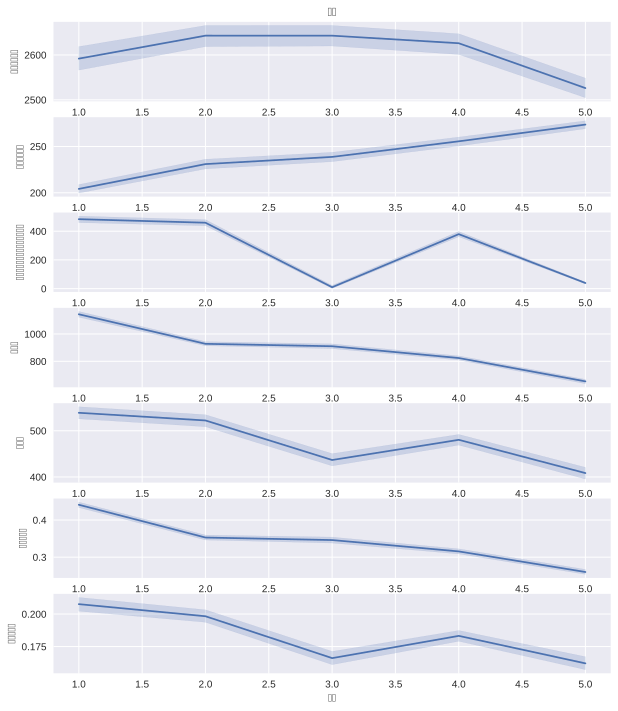

In [35]:
f, ax = plt.subplots(7, figsize=(10,12))

columns = ['식사가능자수', '본사출장자수','본사시간외근무명령서승인건수','중식계',"석식계",'중식참여율','석식참여율']
for i, column in enumerate(columns):
  sns.lineplot(data=train.loc[train['석식계'] != 0.0], x='요일', y=column, ax=ax[i])
  ax[0].set_title("요일")
plt.show()

In [36]:
#요일을 석식 rank에 맞춰 mapping(석식계가 0인 데이터 제외한 랭크)
weekday_rankdinner ={
    1:1,
    2:2,
    3:4,
    4:3,
    5:5
}

train['요일(석식랭크)'] = train['요일'].map(weekday_rankdinner)
test['요일(석식랭크)'] = test['요일'].map(weekday_rankdinner)

In [39]:
#석식계가 0인 데이터 삭제
# train = train.loc[train['석식계'] != 0.0]

In [40]:
train.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수,중식계,석식계,중식참여율,석식참여율,요일(석식랭크)
0,2,1,1,2551.0,150,238,1039.0,331.0,0.407291,0.129753,1
1,2,2,2,2551.0,173,319,867.0,560.0,0.339867,0.219522,2
2,2,3,3,2545.0,180,111,1017.0,573.0,0.399607,0.225147,4
3,2,4,4,2497.0,220,355,978.0,525.0,0.391670,0.210252,3
4,2,5,5,2323.0,181,34,925.0,330.0,0.398192,0.142058,5


In [41]:
test.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수,요일(석식랭크)
0,1,27,3,2537.0,182,5,4
1,1,28,4,2531.0,212,409,3
2,1,29,5,2419.0,249,0,5
3,2,1,1,2494.0,154,538,1
4,2,2,2,2548.0,186,455,2


# 모델 사용

In [42]:
!pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


In [43]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#대회규칙 MAE 사용
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

## 중식

In [44]:
X_lunch = train[['월','일','요일','식사가능자수','본사출장자수','본사시간외근무명령서승인건수']]
y_lunch = train['중식계']

X_train_lunch, X_val_lunch, y_train_lunch, y_val_lunch = train_test_split(X_lunch, y_lunch, test_size=0.2, random_state=42)

print("X_train_lunch shape : {}".format(X_train_lunch.shape), "y_train_lunch shape : {}".format(y_train_lunch.shape))
print("X_val_lunch shape : {}".format(X_val_lunch.shape), "y_val_lunch shape : {}".format(y_val_lunch.shape))

X_train_lunch shape : (929, 6) y_train_lunch shape : (929,)
X_val_lunch shape : (233, 6) y_val_lunch shape : (233,)


In [45]:
lunch_models = [RandomForestRegressor(criterion='mae'), LGBMRegressor(objective='MAE'), XGBRegressor(eval_metric='mae'), CatBoostRegressor(objective='MAE')]

for lunch_model in lunch_models:
  if lunch_model.__class__.__name__ == "CatBoostRegressor":
    lunch_model.fit(X_train_lunch,y_train_lunch, verbose=200)
  else:
    lunch_model.fit(X_train_lunch, y_train_lunch)

  lunch_pred = lunch_model.predict(X_val_lunch)
  print(lunch_model.__class__.__name__, " : MAE : {}".format(MAE(y_val_lunch, lunch_pred)))

RandomForestRegressor  : MAE : 79.24811158798282
LGBMRegressor  : MAE : 75.30481888665071
[06:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor  : MAE : 77.62254326947257
0:	learn: 164.9730131	total: 47.8ms	remaining: 47.8s
200:	learn: 59.8016697	total: 348ms	remaining: 1.38s
400:	learn: 50.7959975	total: 637ms	remaining: 952ms
600:	learn: 44.5214421	total: 941ms	remaining: 625ms
800:	learn: 40.1307813	total: 1.23s	remaining: 305ms
999:	learn: 37.0670073	total: 1.51s	remaining: 0us
CatBoostRegressor  : MAE : 73.20078899518201


##석식

In [46]:
X_dinner = train[['월','일','요일(석식랭크)','식사가능자수','본사출장자수','본사시간외근무명령서승인건수']]
y_dinner = train['석식계']

X_train_dinner, X_val_dinner, y_train_dinner, y_val_dinner = train_test_split(X_dinner, y_dinner, test_size=0.2, random_state=42)

print("X_train_dinner shape : {}".format(X_train_dinner.shape), "y_train_dinner shape : {}".format(y_train_dinner.shape))
print("X_val_dinner shape : {}".format(X_val_dinner.shape), "y_val_dinner shape : {}".format(y_val_dinner.shape))

X_train_dinner shape : (929, 6) y_train_dinner shape : (929,)
X_val_dinner shape : (233, 6) y_val_dinner shape : (233,)


In [47]:
dinner_models = [RandomForestRegressor(criterion='mae'), LGBMRegressor(objective='MAE'), XGBRegressor(eval_metric='mae'), CatBoostRegressor(objective='MAE')]

for dinner_model in dinner_models:
  if dinner_model.__class__.__name__ == "CatBoostRegressor":
    dinner_model.fit(X_train_dinner,y_train_dinner, verbose=200)
  else:
    dinner_model.fit(X_train_dinner, y_train_dinner)

  dinner_pred = dinner_model.predict(X_val_dinner)
  print(dinner_model.__class__.__name__, " : MAE : {}".format(MAE(y_val_dinner, dinner_pred)))

RandomForestRegressor  : MAE : 49.11656652360515
LGBMRegressor  : MAE : 48.47377213168917
[06:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor  : MAE : 49.97965669427307
0:	learn: 83.2509463	total: 1.58ms	remaining: 1.58s
200:	learn: 43.4729992	total: 285ms	remaining: 1.13s
400:	learn: 35.9198308	total: 592ms	remaining: 884ms
600:	learn: 31.5670442	total: 884ms	remaining: 587ms
800:	learn: 28.9683025	total: 1.18s	remaining: 293ms
999:	learn: 26.8553646	total: 1.47s	remaining: 0us
CatBoostRegressor  : MAE : 46.771381377889696


In [48]:
#catboost 모델만 gridsearch
clf = CatBoostRegressor(loss_function='MAE', objective='MAE')

params = {"n_estimators" : [1000,2000,3000],
          'random_seed' : [42],
          }

lunch_grid_model = GridSearchCV(estimator=clf, param_grid=params, cv=5,n_jobs=-1,scoring = "neg_mean_absolute_error")
dinner_grid_model = GridSearchCV(estimator=clf, param_grid=params, cv=5,n_jobs=-1,scoring = "neg_mean_absolute_error")

## 중식(하이퍼파라미터 튜닝)

In [49]:
lunch_grid_model.fit(X_lunch, y_lunch, verbose=400)
print(lunch_grid_model.best_score_)

0:	learn: 165.6392934	total: 1.66ms	remaining: 1.66s
400:	learn: 52.7278163	total: 600ms	remaining: 897ms
800:	learn: 43.2080852	total: 1.2s	remaining: 298ms
999:	learn: 40.4943265	total: 1.51s	remaining: 0us
-84.42081594283367


In [50]:
test_lunch = test[['월','일','요일','식사가능자수','본사출장자수','본사시간외근무명령서승인건수']]
pred_lunch = lunch_grid_model.predict(test_lunch)

## 석식(하이퍼파라미터 튜닝)

In [51]:
dinner_grid_model.fit(X_dinner, y_dinner, verbose=400)
print(dinner_grid_model.best_score_)

0:	learn: 82.9647581	total: 1.93ms	remaining: 1.92s
400:	learn: 37.6925064	total: 634ms	remaining: 948ms
800:	learn: 30.8297609	total: 1.22s	remaining: 304ms
999:	learn: 28.8122498	total: 1.53s	remaining: 0us
-64.23378526033557


In [53]:
test_dinner = test[['월','일','요일(석식랭크)','식사가능자수','본사출장자수','본사시간외근무명령서승인건수']]
pred_dinner = dinner_grid_model.predict(test_dinner)

# 제출

In [54]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/cafeteria/sample_submission.csv")
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [55]:
submission["중식계"] = pred_lunch
submission['석식계'] = pred_dinner

In [56]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/cafeteria/"
sub_name = "80lower_cat_submit2.csv"
submission.to_csv("{}{}".format(sub_path, sub_name), index=False)